In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

### DATA AVAILABLE 
- Customer Acquisition: At the time of card issuing, company maintains the details of customers. 
- Spend (Transaction data): Credit card spend for each customer 
- Repayment: Credit card Payment done by customer

In [2]:
CustomerAcqusition = pd.read_csv('CustomerAcqusition.csv')
Repayment = pd.read_csv('Repayment.csv')
spend = pd.read_csv('spend.csv')

print(CustomerAcqusition.head())
print(Repayment.head())
print(spend.head())

   No Customer  Age       City   Product     Limit Company        Segment
0   1       A1   76  BANGALORE      Gold  500000.0      C1  Self Employed
1   2       A2   71   CALCUTTA    Silver  100000.0      C2   Salaried_MNC
2   3       A3   34     COCHIN  Platimum   10000.0      C3   Salaried_Pvt
3   4       A4   47     BOMBAY  Platimum   10001.0      C4           Govt
4   5       A5   56  BANGALORE  Platimum   10002.0      C5  Normal Salary
   SL No: Customer      Month     Amount
0     NaN       A1  12-Jan-04  495414.75
1     2.0       A1  03-Jan-04  245899.02
2     3.0       A1  15-Jan-04  259490.06
3     4.0       A1  25-Jan-04  437555.12
4     5.0       A1  17-Jan-05  165972.88
   Sl No: Customer      Month       Type     Amount
0       1       A1  12-Jan-04  JEWELLERY  485470.80
1       2       A1   3-Jan-04      PETRO  410556.13
2       3       A1  15-Jan-04    CLOTHES   23740.46
3       4       A1  25-Jan-04       FOOD  484342.47
4       5       A1  17-Jan-05     CAMERA  369694.0

In [3]:
Repayment.rename(columns={'Amount':'Repay_Amt', 'Month':'Re_Month'}, inplace=True)

In [4]:
Repayment.head(1)

,SL No:,Customer,Re_Month,Repay_Amt
0,NaN,A1,12-Jan-04,495414.75


In [5]:
Data = pd.merge(left = CustomerAcqusition,
        right = spend[['Customer', 'Month', 'Type', 'Amount']],
        left_on = ['Customer'],
        right_on = ['Customer'],
        how = 'left',
        indicator = True)
Data.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,_merge
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,both
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,PETRO,410556.13,both


In [6]:
Data1 = pd.merge(left = CustomerAcqusition,
        right = Repayment[['Customer', 'Re_Month', 'Repay_Amt']],
        left_on = ['Customer'],
        right_on = ['Customer'],
        how = 'left',
        indicator = True)
Data1.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Re_Month,Repay_Amt,_merge
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75,both
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,03-Jan-04,245899.02,both


In [7]:
df = pd.concat([Data, Data1], axis=0, ignore_index =True)
df

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Age,Amount,City,Company,Customer,Limit,Month,No,Product,Re_Month,Repay_Amt,Segment,Type,_merge
0,76,485470.80,BANGALORE,C1,A1,500000.0,12-Jan-04,1,Gold,NaN,NaN,Self Employed,JEWELLERY,both
1,76,410556.13,BANGALORE,C1,A1,500000.0,3-Jan-04,1,Gold,NaN,NaN,Self Employed,PETRO,both
2,76,23740.46,BANGALORE,C1,A1,500000.0,15-Jan-04,1,Gold,NaN,NaN,Self Employed,CLOTHES,both
3,76,484342.47,BANGALORE,C1,A1,500000.0,25-Jan-04,1,Gold,NaN,NaN,Self Employed,FOOD,both
4,76,369694.07,BANGALORE,C1,A1,500000.0,17-Jan-05,1,Gold,NaN,NaN,Self Employed,CAMERA,both
5,76,168285.60,BANGALORE,C1,A1,500000.0,23-Feb-05,1,Gold,NaN,NaN,Self Employed,SANDALS,both
6,76,23370.20,BANGALORE,C1,A1,500000.0,1-Feb-05,1,Gold,NaN,NaN,Self Employed,CAR,both
7,76,440563.22,BANGALORE,C1,A1,500000.0,12-Jan-04,1,Gold,NaN,NaN,Self Employed,TRAIN TICKET,both
8,76,52208.65,BANGALORE,C1,A1,500000.0,5-Feb-04,1,Gold,NaN,NaN,Self Employed,BUS TICKET,both
9,76,346925.68,BANGALORE,C1,A1,500000.0,19-Apr-06,1,Gold,NaN,NaN,Self Employed,AIR TICKET,both


### 1. In the above dataset, 
- a. In case age is less than 18, replace it with mean of age values. 

In [8]:
mean_age = df['Age'].mean()
mean_age

44.26866666666667

In [9]:
df['Age'] = df.where(df['Age'] > 18, mean_age)
df

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Implicitly converting categorical to object-dtype ndarray. One or more of the values in 'other' are not present in this categorical's categories. A future version of pandas will raise a ValueError when 'other' contains different categories.

To preserve the current behavior, add the new categories to the categorical before calling 'where', or convert the categorical to a different dtype.
  """Entry point for launching an IPython kernel.


,Age,Amount,City,Company,Customer,Limit,Month,No,Product,Re_Month,Repay_Amt,Segment,Type,_merge
0,76,485470.80,BANGALORE,C1,A1,500000.0,12-Jan-04,1,Gold,NaN,NaN,Self Employed,JEWELLERY,both
1,76,410556.13,BANGALORE,C1,A1,500000.0,3-Jan-04,1,Gold,NaN,NaN,Self Employed,PETRO,both
2,76,23740.46,BANGALORE,C1,A1,500000.0,15-Jan-04,1,Gold,NaN,NaN,Self Employed,CLOTHES,both
3,76,484342.47,BANGALORE,C1,A1,500000.0,25-Jan-04,1,Gold,NaN,NaN,Self Employed,FOOD,both
4,76,369694.07,BANGALORE,C1,A1,500000.0,17-Jan-05,1,Gold,NaN,NaN,Self Employed,CAMERA,both
5,76,168285.60,BANGALORE,C1,A1,500000.0,23-Feb-05,1,Gold,NaN,NaN,Self Employed,SANDALS,both
6,76,23370.20,BANGALORE,C1,A1,500000.0,1-Feb-05,1,Gold,NaN,NaN,Self Employed,CAR,both
7,76,440563.22,BANGALORE,C1,A1,500000.0,12-Jan-04,1,Gold,NaN,NaN,Self Employed,TRAIN TICKET,both
8,76,52208.65,BANGALORE,C1,A1,500000.0,5-Feb-04,1,Gold,NaN,NaN,Self Employed,BUS TICKET,both
9,76,346925.68,BANGALORE,C1,A1,500000.0,19-Apr-06,1,Gold,NaN,NaN,Self Employed,AIR TICKET,both


- b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. (customer’s limit provided in acquisition table is the per transaction limit on his card) 

In [10]:
half = 0.5*df['Limit']
half.head()

0    250000.0
1    250000.0
2    250000.0
3    250000.0
4    250000.0
Name: Limit, dtype: float64

In [11]:
from numpy import where as IF
df['Amount'] = IF((df.Amount > df.Limit), half, df.Amount)
df['Amount']

0       485470.80
1       410556.13
2        23740.46
3       484342.47
4       369694.07
5       168285.60
6        23370.20
7       440563.22
8        52208.65
9       346925.68
10      183839.61
11      344372.10
12      244534.68
13      155611.91
14      176372.82
15      394970.96
16      476702.09
17      361141.31
18       50000.00
19       50000.00
20       50000.00
21       50000.00
22       50000.00
23       75728.35
24       50000.00
25       50000.00
26       50000.00
27       50000.00
28       50000.00
29        5000.00
          ...    
2970          NaN
2971          NaN
2972          NaN
2973          NaN
2974          NaN
2975          NaN
2976          NaN
2977          NaN
2978          NaN
2979          NaN
2980          NaN
2981          NaN
2982          NaN
2983          NaN
2984          NaN
2985          NaN
2986          NaN
2987          NaN
2988          NaN
2989          NaN
2990          NaN
2991          NaN
2992          NaN
2993          NaN
2994      

- c. Incase the repayment amount is more than the limit, replace the repayment with the limit. 

In [12]:
from numpy import where as IF
df['Repay_Amt'] = IF((df.Repay_Amt > df.Limit), df.Limit, df.Repay_Amt)
df['Repay_Amt']

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
5             NaN
6             NaN
7             NaN
8             NaN
9             NaN
10            NaN
11            NaN
12            NaN
13            NaN
14            NaN
15            NaN
16            NaN
17            NaN
18            NaN
19            NaN
20            NaN
21            NaN
22            NaN
23            NaN
24            NaN
25            NaN
26            NaN
27            NaN
28            NaN
29            NaN
          ...    
2970     10002.00
2971    100000.00
2972    100001.00
2973    100002.00
2974    100003.00
2975    265619.05
2976      3159.62
2977     55344.81
2978    193230.31
2979    481205.64
2980    207780.32
2981    342200.74
2982     10002.00
2983    100000.00
2984    100001.00
2985    100002.00
2986    100003.00
2987    146821.30
2988    497237.97
2989    109931.32
2990    247781.00
2991    459105.69
2992    342326.14
2993    153465.89
2994    36


### 2. From the above dataset create the following summaries:  
- a. How many distinct customers exist?  

In [13]:
distinct_customers= df['Customer'].nunique()
distinct_customers

100

- b. How many distinct categories exist?  

In [14]:
distinct_categories= df['Type'].nunique()
distinct_categories

15

- c. What is the average monthly spend by customers?  

In [15]:
average_monthly_spend= df.Amount.mean()
round(average_monthly_spend)

146521

- d. What is the average monthly repayment by customers?  

In [16]:
average_monthly_repayment= df.Repay_Amt.mean()
round(average_monthly_repayment)

163322

- e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? (Profit is defined as interest        earned on Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend. Interest is earned only on positive profits      and not on negative amounts)

In [17]:
df.Month = pd.to_datetime(df.Month)
df.Re_Month = pd.to_datetime(df.Re_Month)

In [18]:
df['Spend_Month'], df['Repay_Month'] = pd.to_datetime(df['Month']).dt.to_period('M'), pd.to_datetime(df['Re_Month']).dt.to_period('M')

In [19]:
sum1 = df.groupby(['Spend_Month']).agg({'Amount':['sum']})
#sum1.rename(columns={'Spend_Month':'Month'}, inplace=True)
sum1

,Amount
,sum
Spend_Month,
2004-01,44279811.96
2004-02,3835951.84
2004-03,1871913.27
2004-04,3489415.34
2004-05,2146577.36
2004-09,2402109.69
2004-11,1114989.10
2005-01,5383606.78


In [20]:
sum2= df.groupby(['Repay_Month']).agg({'Repay_Amt':['sum']})
sum2.head(2)

,Repay_Amt
,sum
Repay_Month,
2004-01,44792020.72
2004-02,3391537.65


In [21]:
Netprofit = pd.concat([sum1, sum2], axis=1, ignore_index =False)
Netprofit.head(2)

,Amount,Repay_Amt
,sum,sum
2004-01,44279811.96,44792020.72
2004-02,3835951.84,3391537.65


In [22]:
minus = Netprofit['Repay_Amt'] - Netprofit['Amount']
minus.head(2)

,sum
2004-01,512208.76
2004-02,-444414.19


In [23]:
minus['Profit'] = minus['sum'] * 0.029
minus.head(2)

,sum,Profit
2004-01,512208.76,14854.05404
2004-02,-444414.19,-12888.01151


In [24]:
Monthly_Profit = minus[(minus > 0).any(axis=1)]
Monthly_Profit

,sum,Profit
2004-01,512208.76,14854.05404
2004-03,794605.95,23043.57255
2004-04,1779564.40,51607.36760
2004-05,1636182.55,47449.29395
2004-11,673409.53,19528.87637
2005-05,9171152.27,265963.41583
2005-07,108095.86,3134.77994
2005-08,1581603.69,45866.50701
2005-10,376907.32,10930.31228
2005-12,967604.61,28060.53369


- f. What are the top 5 product types?  

In [25]:
top=df.groupby('Type')['Amount'].sum(level=0)
top.nlargest(5)

Type
PETRO           28597384.98
CAMERA          27690738.44
FOOD            20519243.60
AIR TICKET      20155847.12
TRAIN TICKET    19995825.72
Name: Amount, dtype: float64

In [26]:
t = df.groupby(['Type']).Amount.sum()
t.nlargest(5)

Type
PETRO           28597384.98
CAMERA          27690738.44
FOOD            20519243.60
AIR TICKET      20155847.12
TRAIN TICKET    19995825.72
Name: Amount, dtype: float64

- g. Which city is having maximum spend?  

In [27]:
max_spend_city = df.groupby(['City']).Amount.sum()
max_spend_city.nlargest(3)

City
COCHIN       45963513.50
CALCUTTA     41108132.30
BANGALORE    40461647.02
Name: Amount, dtype: float64

- h. Which age group is spending more money?

In [28]:
df['Age_Group']= IF((df.Age >= 18) & (df.Age <= 30), 'Young',
                  IF((df.Age > 30) & (df.Age <= 45), 'Adult',
                     IF((df.Age > 45) & (df.Age <= 60), 'Matured',
                        IF((df.Age > 60) & (df.Age <= 75), 'Retired_age', 'Senior'))))

In [29]:
t = df.groupby(['Type']).Amount.sum()
t.nlargest(5)

Type
PETRO           28597384.98
CAMERA          27690738.44
FOOD            20519243.60
AIR TICKET      20155847.12
TRAIN TICKET    19995825.72
Name: Amount, dtype: float64

In [30]:
max_spend_age_group = df.groupby(['Age_Group']).Amount.sum()
max_spend_age_group.nlargest(5)

Age_Group
Adult          71262600.84
Matured        52817960.80
Young          52689898.21
Retired_age    23287121.62
Senior         19723503.76
Name: Amount, dtype: float64

-  i. Who are the top 10 customers in terms of repayment?

In [31]:
top_10_customers_repay = df.groupby(['Customer']).Repay_Amt.sum()
top_10_customers_repay.nlargest(10)

Customer
A61    10539142.91
A60     9876290.74
A13     9572000.66
A43     8489871.46
A45     8448334.87
A12     8334760.16
A14     7943268.63
A44     7744730.12
A39     7622483.30
A42     7615460.86
Name: Repay_Amt, dtype: float64

### 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [32]:
df['Spend_Year'], df['Repay_Year'] = pd.DatetimeIndex(df['Month']).year, pd.DatetimeIndex(df['Re_Month']).year

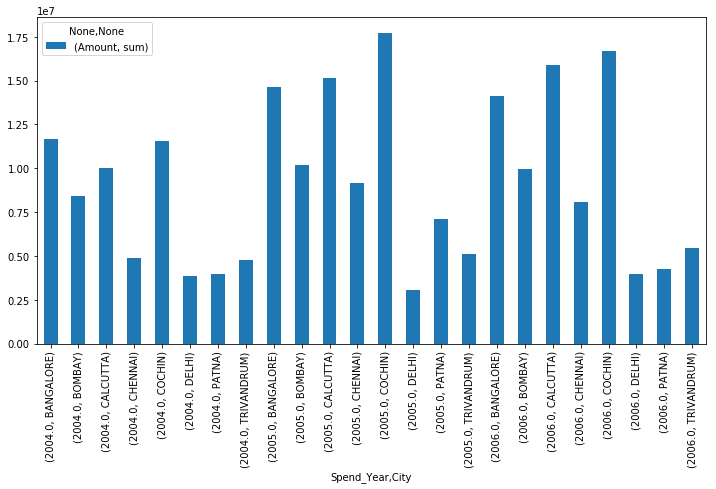

In [33]:
city_wise_spend = df.groupby(['Spend_Year', 'City']).agg({'Amount':['sum']})
city_wise_spend_graph = city_wise_spend.plot.bar(figsize=(12,6))

### 4. Create graphs for  
- a. Monthly comparison of total spends, city wise  

In [34]:
#first: city wise monthly sales for all years

In [35]:
city_wise_Monthly_spend = df.groupby(['City', 'Spend_Month'])[['Amount']].sum()

In [36]:
city_wise_Monthly_spend = city_wise_Monthly_spend.pivot_table(index ='City', columns='Spend_Month')

In [37]:
city_wise_Monthly_spend.head()

Amount                                                \
Spend_Month     2004-01     2004-02    2004-03     2004-04    2004-05   
City                                                                    
BANGALORE    8662102.77   535939.92   82428.80  1405495.85  783277.82   
BOMBAY       5350399.72  1016569.54  507931.43   479946.78    5000.50   
CALCUTTA     7920520.66   626394.70  358822.88    55001.00  239397.51   
CHENNAI      3962503.69         NaN  427931.80         NaN   14664.26   
COCHIN       8762429.20   384884.81  153175.37   707487.06  806452.60   

                                                                       ...  \
Spend_Month    2004-09    2004-11     2005-01     2005-02     2005-04  ...   
City                                                                   ...   
BANGALORE     50000.00  175218.26   374694.07  5461325.81   260930.95  ...   
BOMBAY       484628.87  572730.66   598593.61  2072631.17   565143.46  ...   
CALCUTTA     709699.03  105001.50   302528.95  6143069.67  1328069.30  ...   
CHENNAI      472227.99        NaN   499457.67  3464890.80   266669.13  ...   
COCHIN       635552.80  100002.00  2438935.00  3974781.89   145515.74  ...   

                                                                        \
Spend_Month     2006-03     2006-04     2006-05    2006-06     2006-07   
City                                                                     
BANGALORE    5280474.27  2541553.68  1758967.31  178862.84  1475186.17   
BOMBAY       4719919.07   828694.77   453418.59  148016.23   177726.32   
CALCUTTA     4580217.16  2074437.65  1597450.56  986665.42  1784917.49   
CHENNAI      2755711.91  2251987.86   122739.69  467923.97   462601.38   
COCHIN       5491971.16  3029742.14  1526522.52  302130.52  1043566.71   

                                                                      
Spend_Month     2006-08    2006-09    2006-10     2006-11    2006-12  
City                                                                  
BANGALORE      25860.69  578315.60  663820.62   570744.05  315909.04  
BOMBAY        534327.56        NaN  604217.26  1187960.02  140040.71  
CALCUTTA     1168211.46  509350.86  196357.83   744589.89   50001.00  
CHENNAI       305875.97   43209.23  156247.17   363370.92  223628.27  
COCHIN        894170.44  606219.69  468878.97  1098175.93  327118.44  

[5 rows x 30 columns]

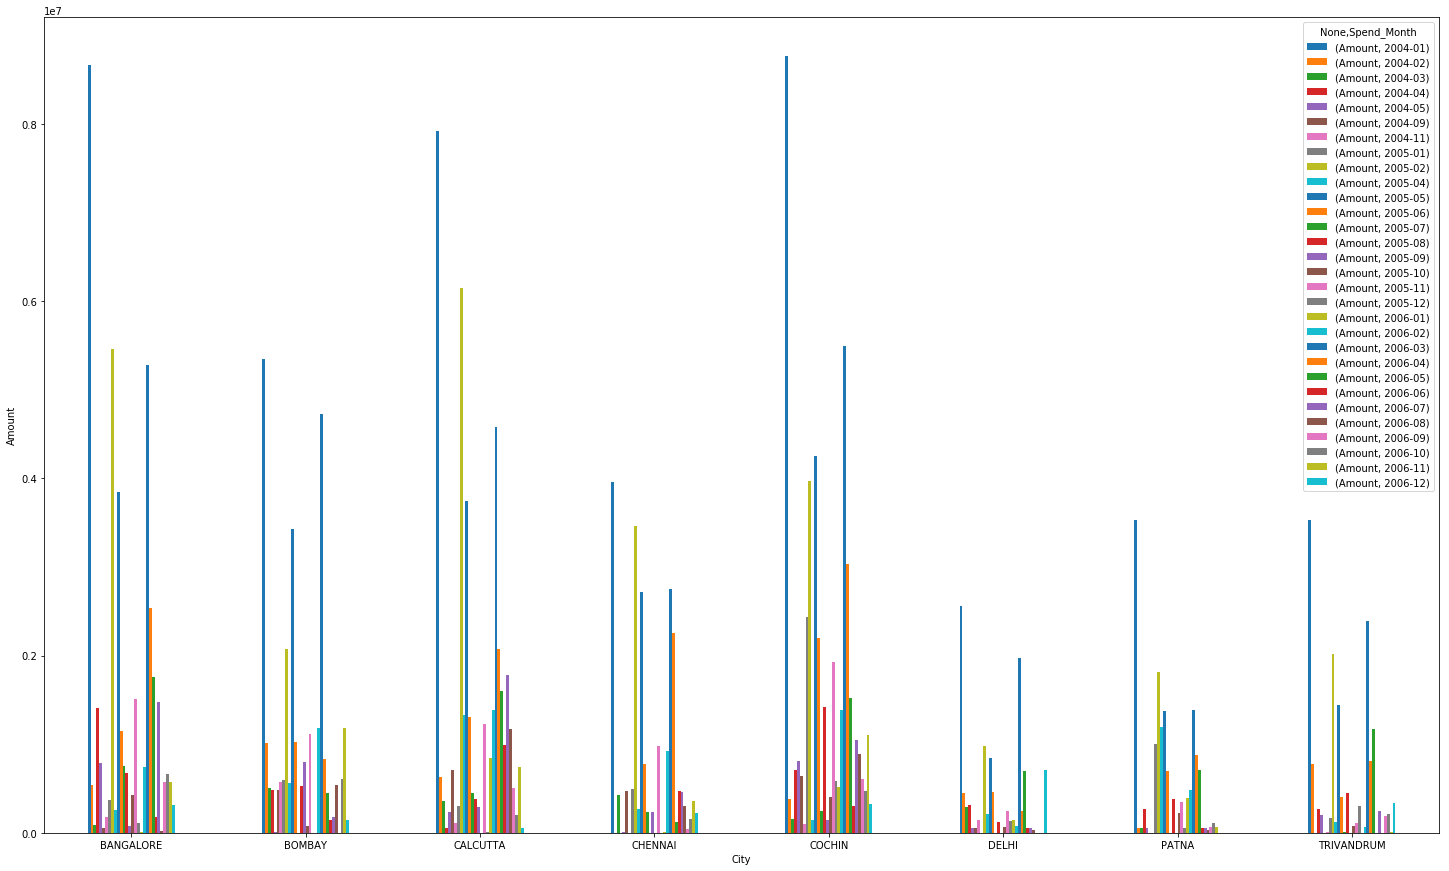

In [38]:
city_wise_Monthly_spend.plot(kind='bar', figsize=(25,15))
plt.ylabel('Amount')
plt.xticks(rotation='horizontal')
plt.show()

In [39]:
#now: city wise monthly sales per each year 2004, 2005 & 2006 respectively

In [40]:
#for 2004
df1 = df.where(df['Spend_Year'] == 2004.0)

In [41]:
city_wise_monthly_spend_2004 = df1.groupby(['City', 'Spend_Month'])[['Amount']].sum()

In [42]:
city_wise_monthly_spend_2004 = city_wise_monthly_spend_2004.pivot_table(index ='City', columns='Spend_Month')

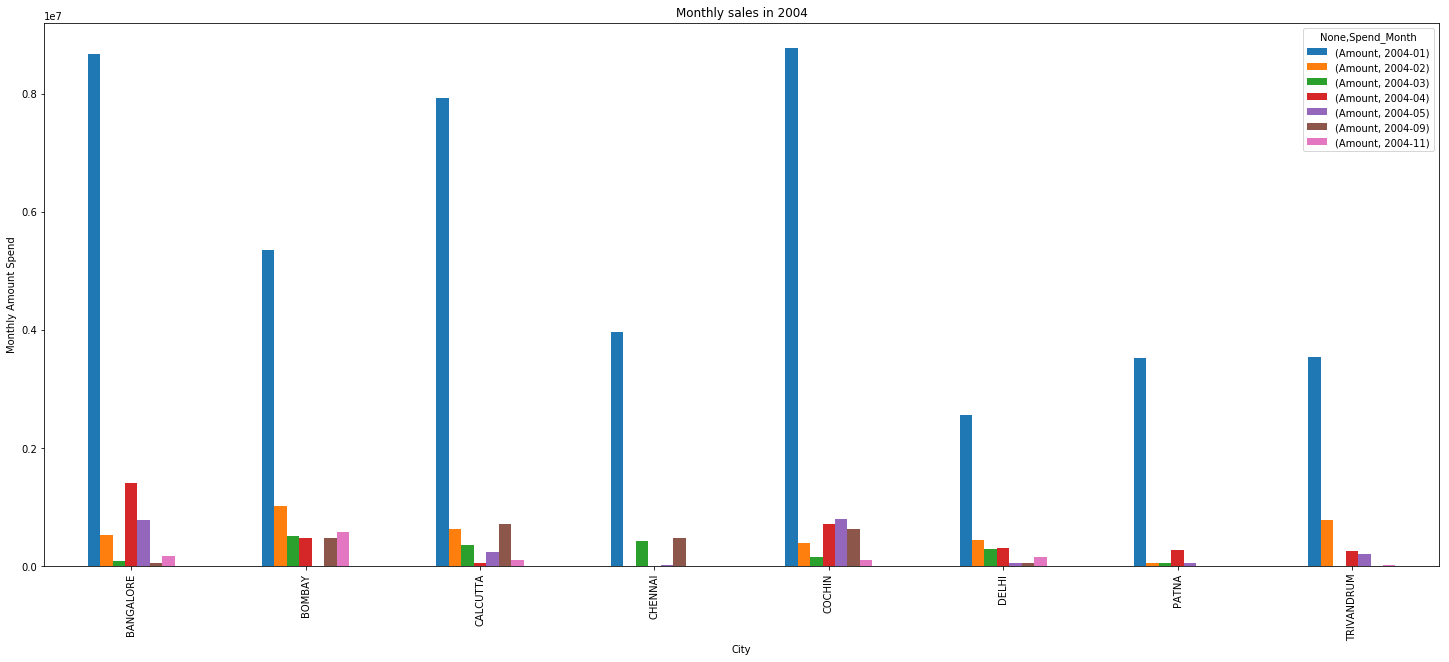

In [43]:
city_wise_monthly_spend_2004.plot(kind='bar', figsize=(25,10))
plt.xlabel('City')
plt.ylabel('Monthly Amount Spend')
plt.title('Monthly sales in 2004')
plt.show()

In [44]:
#for 2005
df2 = df.where(df['Spend_Year'] == 2005.0)

In [45]:
city_wise_monthly_spend_2005 = df1.groupby(['City', 'Spend_Month'])[['Amount']].sum()

In [46]:
city_wise_monthly_spend_2005 = city_wise_monthly_spend_2005.pivot_table(index ='City', columns='Spend_Month')

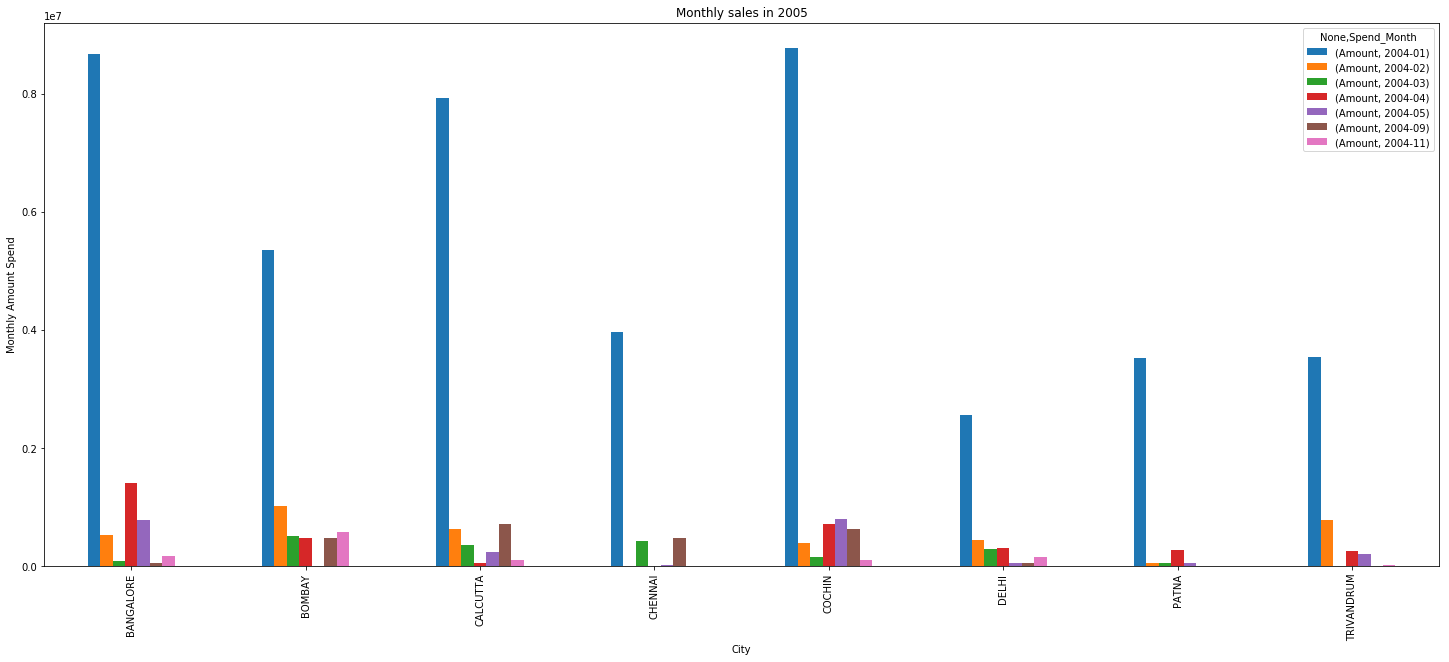

In [47]:
city_wise_monthly_spend_2005.plot(kind='bar', figsize=(25,10))
plt.xlabel('City')
plt.ylabel('Monthly Amount Spend')
plt.title('Monthly sales in 2005')
plt.show()

In [48]:
#for 2006
df3 = df.where(df['Spend_Year'] == 2006.0)

In [49]:
city_wise_monthly_spend_2006 = df1.groupby(['City', 'Spend_Month'])[['Amount']].sum()

In [50]:
city_wise_monthly_spend_2006 = city_wise_monthly_spend_2006.pivot_table(index ='City', columns='Spend_Month')

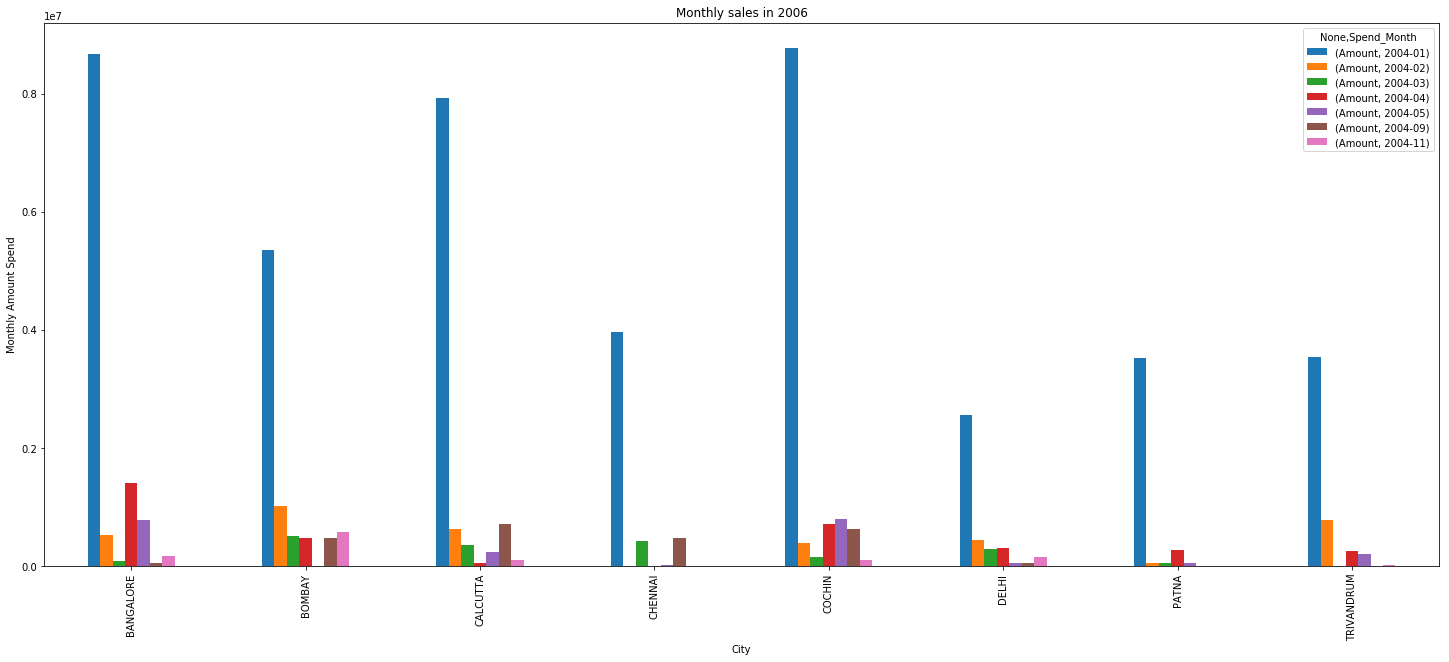

In [51]:
city_wise_monthly_spend_2006.plot(kind='bar', figsize=(25,10))
plt.xlabel('City')
plt.ylabel('Monthly Amount Spend')
plt.title('Monthly sales in 2006')
plt.show()

- b. Comparison of yearly spend on air tickets  

In [52]:
air_tickets = df.where(df['Type'] == 'AIR TICKET')

In [53]:
yearly_spend_air_tickets = air_tickets.groupby(air_tickets['Spend_Year']).agg({'Amount' : ['sum']})
yearly_spend_air_tickets

,Amount
,sum
Spend_Year,
2004.0,4357225.35
2005.0,10550152.21
2006.0,5248469.56


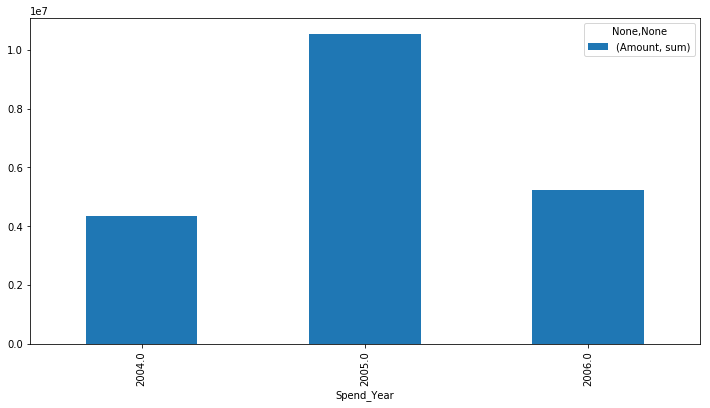

In [54]:
yearly_spend_air_tickets.plot.bar(figsize=(12,6))

- c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

In [55]:
#first at overall 

In [56]:
comp = df.groupby(['Product','Spend_Month']).agg({'Amount':['sum']})

Text(0.5, 0, 'Spend_Month')

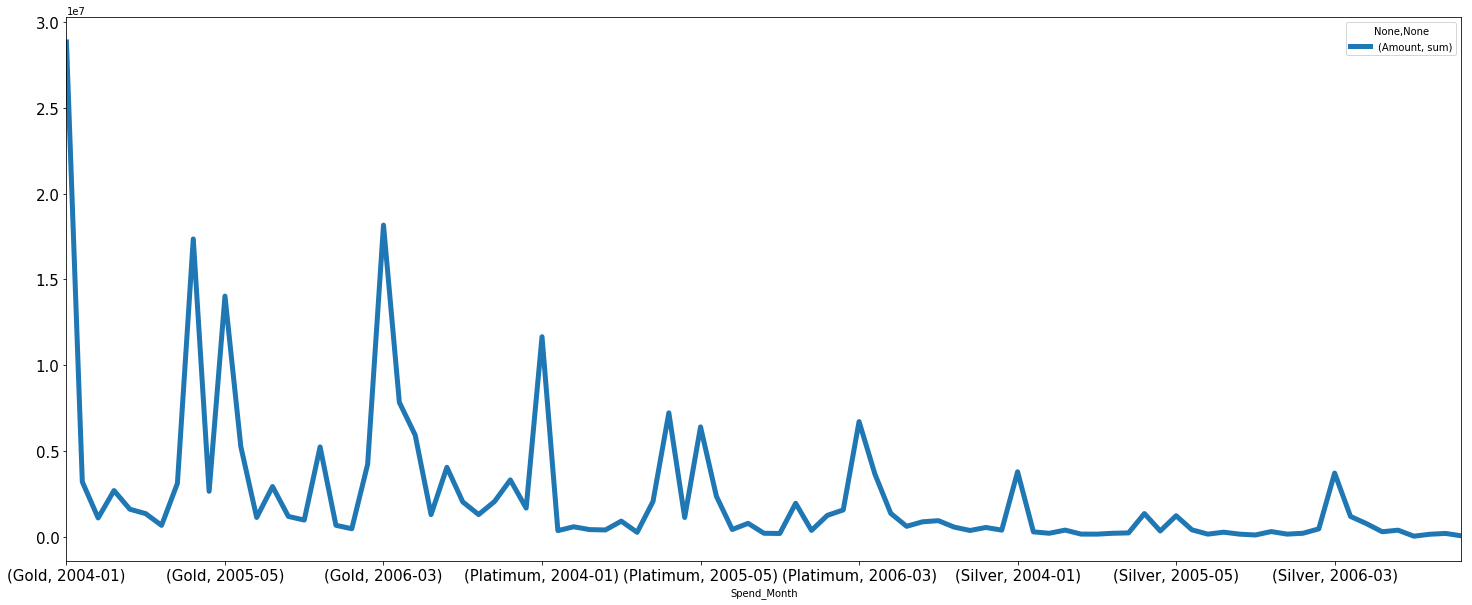

In [57]:
comp.plot(figsize =(25,10), linewidth = 5, fontsize = 15)
plt.xlabel('Spend_Month')

In [58]:
df.head()

,Age,Amount,City,Company,Customer,Limit,Month,No,Product,Re_Month,Repay_Amt,Segment,Type,_merge,Spend_Month,Repay_Month,Age_Group,Spend_Year,Repay_Year
0,76,485470.80,BANGALORE,C1,A1,500000.0,2004-01-12,1,Gold,NaT,NaN,Self Employed,JEWELLERY,both,2004-01,NaT,Senior,2004.0,NaN
1,76,410556.13,BANGALORE,C1,A1,500000.0,2004-01-03,1,Gold,NaT,NaN,Self Employed,PETRO,both,2004-01,NaT,Senior,2004.0,NaN
2,76,23740.46,BANGALORE,C1,A1,500000.0,2004-01-15,1,Gold,NaT,NaN,Self Employed,CLOTHES,both,2004-01,NaT,Senior,2004.0,NaN
3,76,484342.47,BANGALORE,C1,A1,500000.0,2004-01-25,1,Gold,NaT,NaN,Self Employed,FOOD,both,2004-01,NaT,Senior,2004.0,NaN
4,76,369694.07,BANGALORE,C1,A1,500000.0,2005-01-17,1,Gold,NaT,NaN,Self Employed,CAMERA,both,2005-01,NaT,Senior,2005.0,NaN


In [59]:
# now at individual product wise

In [60]:
df4=df.where(df['Product'] == 'Silver')

In [61]:
seasonality_trend_for_silver = df4.groupby(['Product', 'Spend_Month']).agg({'Amount':['sum']})

Text(0.5, 0, 'Spend_Month')

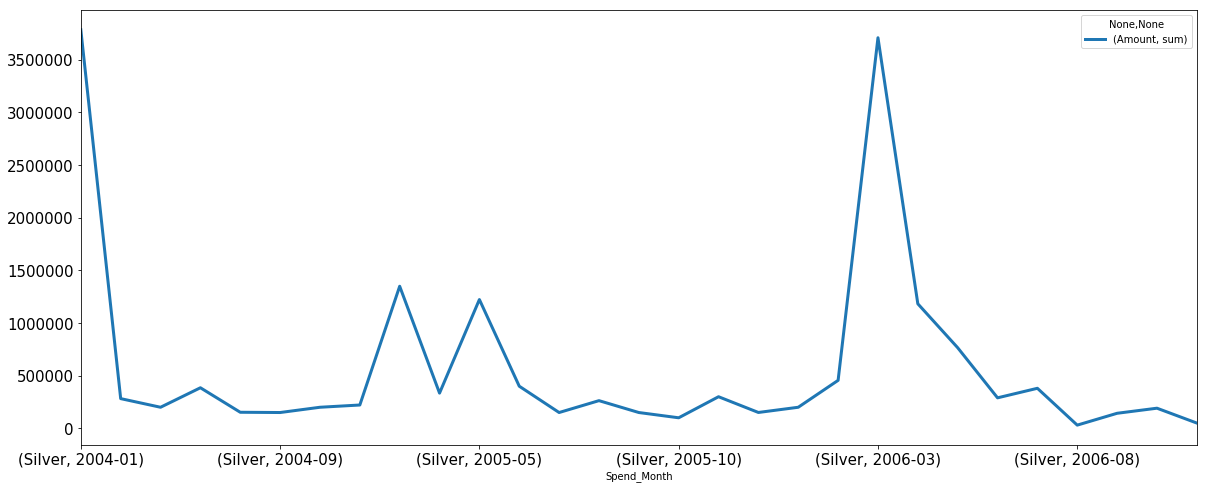

In [62]:
seasonality_trend_for_silver.plot(figsize =(20,8), linewidth = 3, fontsize=15)
plt.xlabel('Spend_Month')

In [63]:
df5=df.where(df['Product'] == 'Gold')

In [64]:
seasonality_trend_for_gold = df5.groupby(['Product', 'Spend_Month']).agg({'Amount':['sum']})

Text(0.5, 0, 'Spend_Month')

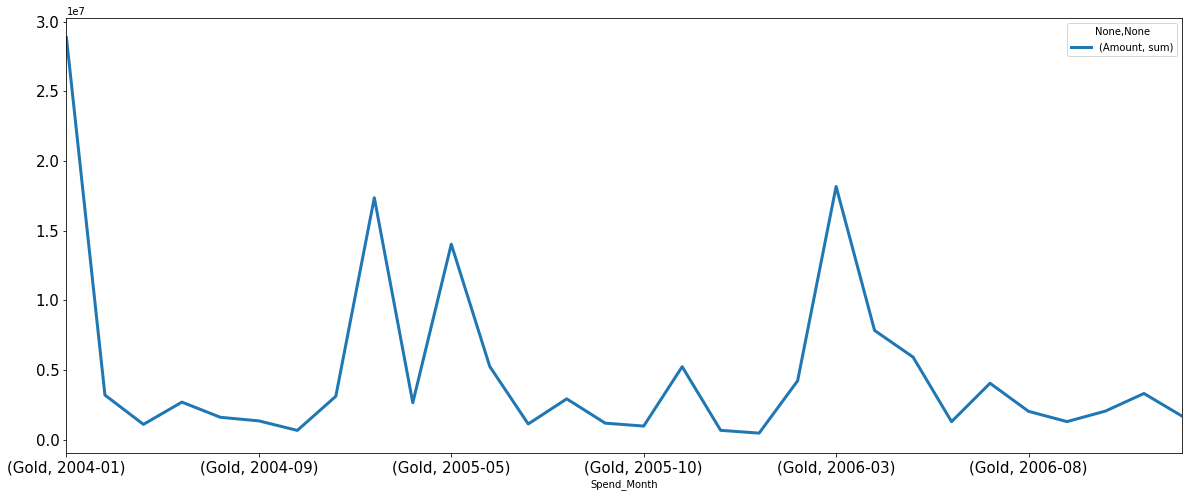

In [65]:
seasonality_trend_for_gold.plot(figsize =(20,8), linewidth = 3, fontsize=15)
plt.xlabel('Spend_Month')

In [66]:
df6=df.where(df['Product'] == 'Platimum')

In [67]:
seasonality_trend_for_platinum = df6.groupby(['Product', 'Spend_Month']).agg({'Amount':['sum']})

Text(0.5, 0, 'Spend_Month')

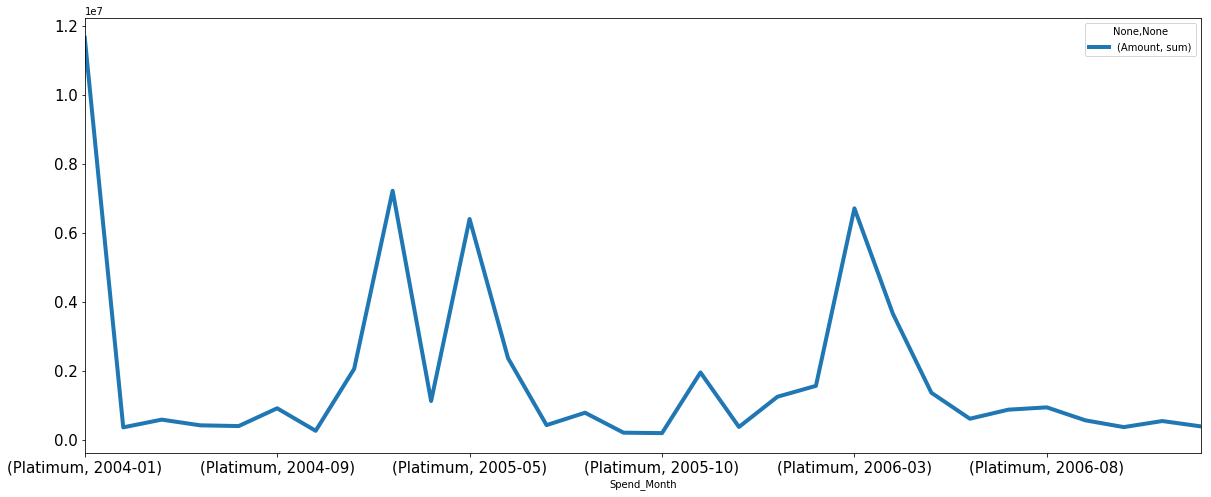

In [68]:
seasonality_trend_for_platinum.plot(figsize =(20,8), linewidth = 4, fontsize=15)
plt.xlabel('Spend_Month')

### 5. Write user defined PYTHON function to perform the following analysis: You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.

In [169]:
def Tops10Customer(Time,Product):
    if Time=="Yearly":
        s = df.where(df['Product']==Product)
        t= s.groupby(['City', 'Product', 'Repay_Year', 'Customer']).agg({'Repay_Amt':'sum'})
        g= t['Repay_Amt'].groupby(level=0, group_keys=False)
        return g.nlargest(10)
        
    elif Time=="Monthly":
        s = df.where(df['Product']==Product)
        t= s.groupby(['City', 'Product', 'Re_Month', 'Customer']).agg({'Repay_Amt':'sum'})
        g= t['Repay_Amt'].groupby(level=0, group_keys=False)
        return g.nlargest(10)
    else:
        print("Please enter Time Period (Yearly/Monhtly) correctly")
        
Time1 = input("Choose Monthly/Yearly")
Category1 = input("Choose Product Gold/Silver/Platimum")

print(Tops10Customer(Time1,Category1)) 

Choose Monthly/YearlyMonthly
Choose Product Gold/Silver/PlatimumGold
City        Product  Re_Month    Customer
BANGALORE   Gold     2004-01-12  A1           845861.57
                                 A13          835282.67
                     2006-07-11  A43          803935.53
                     2004-01-03  A13          792385.90
                     2004-01-12  A43          746786.29
                     2004-01-15  A1           712517.70
                     2005-02-23  A14          700820.28
                     2005-08-12  A13          651872.93
                     2006-05-10  A30          644572.12
                     2004-01-03  A14          614848.26
BOMBAY      Gold     2006-05-10  A42          887910.15
                     2004-01-15  A42          846637.61
                     2004-01-25  A12          754278.21
                     2004-01-12  A62          749654.14
                                 A42          747330.10
                     2006-07-11  A12          703